# Exploratory Data Analysis on Haberman Dataset:

**First, load the haberman dataset using pandas**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
hm = pd.read_csv("haberman.csv")
print(hm.shape)

(306, 4)


# Columns of the dataset are: 

In [46]:
print(hm.columns)

Index(['age', 'op_year', 'axil_nodes', 'surv_status'], dtype='object')


There are 4 attributes in this data set out of which 3 are features and 1 class attribute as below. Also, there are 306 instances of data.

  * Age
  * Operation Year
  * Axillary nodes
  * Survival Status


  1. Age: It represent the age of patient at which they undergone surgery (age from 30 to 83)
  2. Operation year: Year in which patient was undergone surgery(1958–1969)
  3. Lymph Node: Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)
  4. Survival Status: It represent whether patient survive more than 5 years or less after undergone through surgery.Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

In [49]:
print(hm)

     age  op_year  axil_nodes  surv_status
0     30       64           1            1
1     30       62           3            1
2     30       65           0            1
3     31       59           2            1
4     31       65           4            1
..   ...      ...         ...          ...
301   75       62           1            1
302   76       67           0            1
303   77       65           3            1
304   78       65           1            2
305   83       58           2            2

[306 rows x 4 columns]


# Classified the data points of the each class:

In [50]:
hm["surv_status"].value_counts()

1    225
2     81
Name: surv_status, dtype: int64

 **Observations:**
   * Above code indicates that there are 225 patients out of 306 were survived more than 5 years and only 81 patients survived less than 5 years

# OBJECTIVE:

   * To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of axilliary nodes


# 2-D Scatter plot :

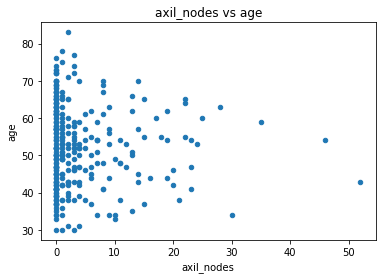

In [17]:
hm.plot(kind='scatter', x='axil_nodes', y='age') ;
plt.title("axil_nodes vs age")
plt.show()

**Observation:**
* 2-D Scatter plot is not able to give the correct intuition about the survival status, let's try with the other plots.

# 2-D Scatter colour plot:

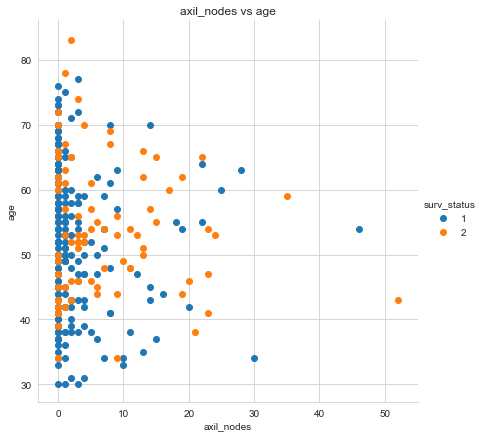

In [28]:
sns.set_style("whitegrid");
sns.FacetGrid(hm, hue="surv_status", size=6) \
   .map(plt.scatter, "axil_nodes", "age") \
   .add_legend();
plt.title("axil_nodes vs age")
plt.show();

**Observation:** 
* In the above plot, blue dots indicates the patients who survived more than 5 years and orange dots indicates the patients who survived less than 5 year after the treatment

# Pair-plots:

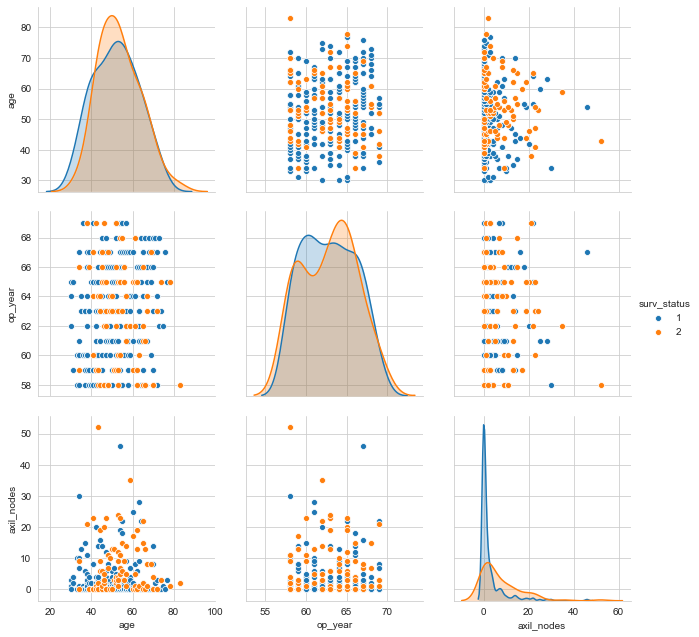

In [53]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hm, hue="surv_status", size=3,vars=["age","op_year", "axil_nodes"]);
plt.show()

**Observations :**
   * plot 1,plot 5,plot 9 are the histograms of combination of features.so,let's analyse the plots excluding the plots 1,5,9
   * plot 2: In this plot you can see that there is operation year on X-axis and age on Y-axis and the plot of the data is mostly overlapping on each other data, so we cannot distinguish.
   * plot 3: In this plot there are some points which is distinguishable but it is better from other plot.
   * plot 4: It is as same as the plot 2 but the axis are interchanged.
   * plot 6: In this plot,overlapping of data points are more compared to the other plots
   * plot 7: It is as same as the plot 3 but the axis are interchanged.
   * plot 8: It is as same as the plot 6 but the axis are interchanged
   
   * Considering the above all plots, plot 3 and plot 7 are giving clear idea compared to all other plots. so let's analyse further using the age and axil_nodes
   
***let's start analysing the features using 1-D  scatter plots***

# 1-D Scatter plot

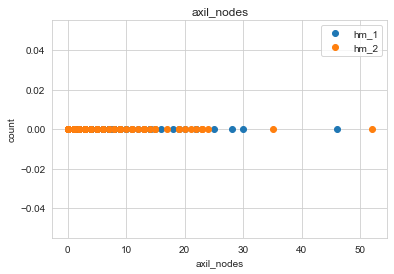

In [68]:
import numpy as np
hm_1 = hm.loc[hm["surv_status"] == 1];
hm_2 = hm.loc[hm["surv_status"] == 2];

h1 = plt.plot(hm_1["axil_nodes"], np.zeros_like(hm_1['axil_nodes']), 'o',label = "hm_1")
h2 = plt.plot(hm_2["axil_nodes"], np.zeros_like(hm_2['axil_nodes']), 'o',label = "hm_2") 
plt.title("axil_nodes") 
plt.xlabel("axil_nodes")
plt.ylabel("count")
plt.legend()
plt.show()

**Observations:**
* Based on 1-D scatter plots,we con't conclude because survival featues are overlapping

# Histogram and PDF of age:

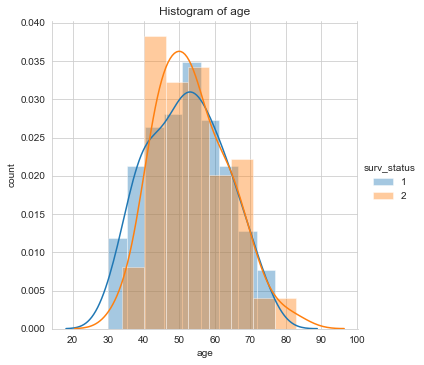

In [69]:
sns.FacetGrid(hm, hue="surv_status", size=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("Histogram of age")
plt.ylabel("count")
plt.show();


**Observation:**
* From the above histogram, pdf's are almost overlapping,so we can't differentiate the survival status based on the age. 

# Histogram and PDF of Operation year:

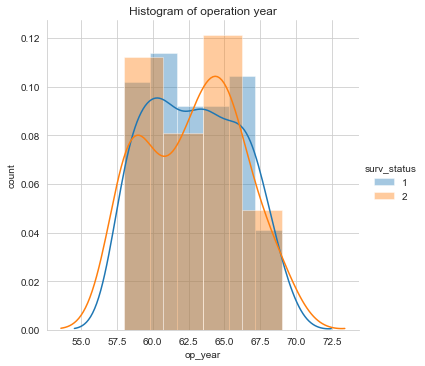

In [66]:
sns.FacetGrid(hm, hue="surv_status", size=5) \
   .map(sns.distplot, "op_year") \
   .add_legend();
plt.title("Histogram of operation year")
plt.ylabel("count")
plt.show();

**Observation:**
* From the above histogram, pdf's are almost overlapping,so we can't differentiate the survival status based on the operation year.

# Histogram and PDF of axilliary nodes:

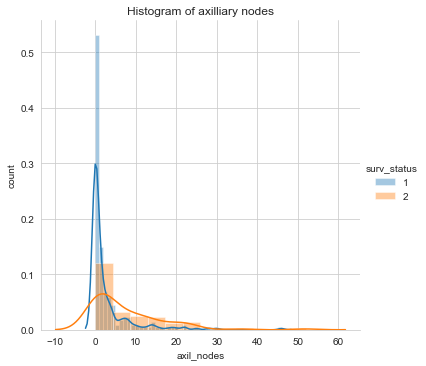

In [67]:
sns.FacetGrid(hm, hue="surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.title("Histogram of axilliary nodes")
plt.ylabel("count")
plt.show();

**Observation:** 
* It has been observed that people survive long if they have less axillary nodes detected and vice versa but still it is hard to classify but this is the best data you can choose among all. So, we can accept the PDF of Axillary nodes.

 if(AxillaryNodes≤0)  \
    Patient= Long survival \
 else if(AxillaryNodes≥0 && Axillary nodes≤4(approx))  \
   Patient= chances of long survival are high  \
 else if(Axillary nodes ≥4)  \
   Patient = Short survival  

# CDF:

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


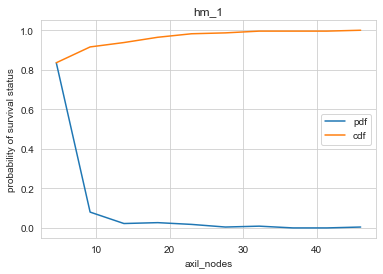

In [63]:
counts, bin_edges = np.histogram(hm_1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "pdf")
plt.plot(bin_edges[1:], cdf,label = "cdf")

plt.xlabel("axil_nodes")
plt.ylabel("probability of survival status")
plt.legend()
plt.title("hm_1")
plt.show();

**Observation:**
* From above CDF we can observe that orange line shows there is a 80% chance of long survival if number of axillary nodes are detected between 0 and 5. Also you can see as number of axillary nodes increases survival chances also reduces means it is clearly observed that 80% — 85% of people have good chances of survival if they have less no of auxillary nodes detected and as nodes increases the survival status also decreases as a result 100% of people have less chances of survival if nodes are greater than 40

# PDF & CDF of hm_1 and hm_2:

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


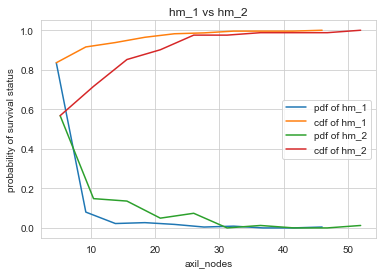

In [62]:
counts, bin_edges = np.histogram(hm_1['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "pdf of hm_1")
plt.plot(bin_edges[1:], cdf,label = "cdf of hm_1")



counts, bin_edges = np.histogram(hm_2['axil_nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = "pdf of hm_2")
plt.plot(bin_edges[1:], cdf,label = "cdf of hm_2")

plt.xlabel("axil_nodes")
plt.ylabel("probability of survival status")
plt.legend()
plt.title("hm_1 vs hm_2")
plt.show();

**Observation:**
* we can observe in above combine CDF, for Long survival observation is same but in Short survival nearly 55% of people who have nodes less than 5 and there are approximately 100% of people in short survival if the nodes are greater than 40.

# Mean, Std_deviation, Median, Quantiles and MAD:

In [75]:
print("Means:")
print(np.mean(hm_1["axil_nodes"]))

print(np.mean(np.append(hm_1["axil_nodes"],100)));
print(np.mean(hm_2["axil_nodes"]))

print("\nStd-dev:");
print(np.std(hm_1["axil_nodes"]))
print(np.std(hm_2["axil_nodes"]))

print("\nMedians:")
print(np.median(hm_1["axil_nodes"]))
#Median with an outlier
print(np.median(np.append(hm_1["axil_nodes"],100)));
print(np.median(hm_2["axil_nodes"]))


print("\nQuantiles:")
print(np.percentile(hm_1["axil_nodes"],np.arange(0, 100, 25)))
print(np.percentile(hm_2["axil_nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(hm_1["axil_nodes"],90))
print(np.percentile(hm_2["axil_nodes"],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation:")
print(robust.mad(hm_1["axil_nodes"]))
print(robust.mad(hm_2["axil_nodes"]))


Means:
2.7911111111111113
3.2212389380530975
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632

Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation:
0.0
5.930408874022408


**Observations:**
   * Mean of long survival is 2.79 and including outlier(100) it is 3.2 that is almost same, but the mean of short survive is 7.45 which is comparatively much higher than the long survival. So the probability for short survival is more in data set.
   * standard deviation for long survival is 5.85 and short survival has 9.12, means the spread of data for short survival is more.
   * From the above median, it is clear that average axillary nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 auxillary nodes have short survival status and outlier is not effecting the median.
   * Quantiles shows that nearly 50th percentile of axillary nodes are 0 in long survival and 75th percentile of patients have nodes less than 3 that is 25% of patients are having nodes more than 3.
   * Similarly, In short survival 75th percentile of patients have minimum 11 nodes detected.
   * At 90th percentile,if nodes are greater than 8 then it has long survival status and if nodes are greater than 20 then patients will have short survival status
   * Median absolute deviation for long survaval is 0 and for short survival is 5.93.

# Box plot and whiskers:

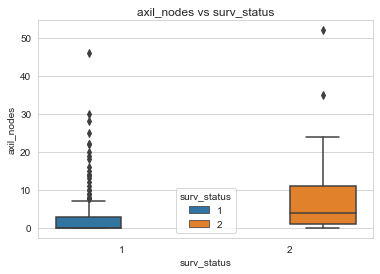

In [42]:
sns.boxplot(x='surv_status',y='axil_nodes', data=hm, hue="surv_status")
plt.title("axil_nodes vs surv_status")
plt.show()

**Observation:**
* In above box plot, 25th percentile and 50th percentile are almost same for Long survival,75th percentile is nearly 3 to 4 and threshold for it is 0 to 7(approx). Also, for short survival there are 50th percentile of nodes are nearly same as long survive 75th percentile. Threshold for the Short survival is nearly 0 to 25 nodes and 75th percentile is nearly 12 and 25th percentile is nearly 1 to 2

# Violin plot:

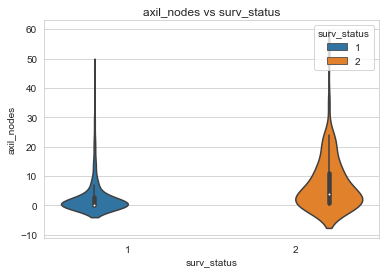

In [43]:
sns.violinplot(x="surv_status", y="axil_nodes", data=hm, size=8, hue="surv_status") 
plt.title("axil_nodes vs surv_status")
plt.show()

**Observation:** 
* In above violin plot,we observe that for long survival density for it is more near the 0 nodes and also it has whiskers in range o-7 and in violin 2 it shows the short survival density more from 0 to 20.

# Contour plot:

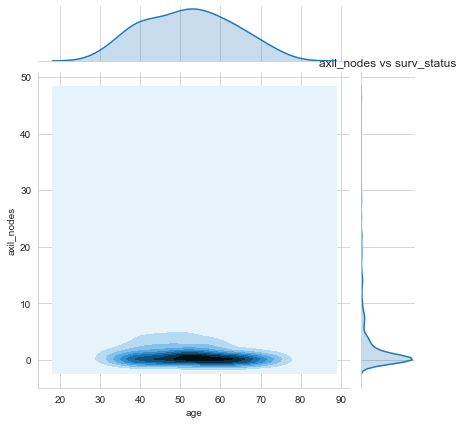

In [21]:
sns.jointplot(x="age", y="axil_nodes", data=hm_1, kind="kde");
plt.title("axil_nodes vs surv_status")
plt.show();

**Observation:** 
* Above contour plot is drawn using the features age and axillary nodes, it is observed that the density of point for long survival is more from age range 45–65 and axillary nodes from 0–3. The dark area have major density which is hill top in 3D and density is getting low as graph get lighter.

# **Conclusion:**
* Patient’s age and operation year alone are not deciding factors for his/her survival. Yet, people less than 35 years have more chance of survival.
* Survival chance is inversely proportional to the number of positive axillary nodes. We also saw that the absence of positive axillary nodes cannot always guarantee survival.